<a href="https://colab.research.google.com/github/hainmit09/DataAnalysis/blob/main/B%C3%A0i_5_Data_Visualization_3_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trực quan hóa dữ liệu sử dụng Seaborn
- 1. Biểu đồ xu hướng
- 2. Biểu đồ phân bố
- 3. Biểu đồ tần số
- 4. Biểu đổ heatmap
- 5. Biểu đồ hộp (boxplot)
- 6. Biểu đồ cặp
# Vẽ đồ thì con trong đồ thị lớn (matplotlib)
# Vẽ đồ thị dựa vào pandas


#0. Import các thư viện mà cần thiết

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#1. Nạp dữ liệu tips vào pandas

In [49]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#2. Đồ thị xu hướng
sns.lmplot(x="total_bill", y="tip", data=tips)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


<Figure size 1152x648 with 0 Axes>

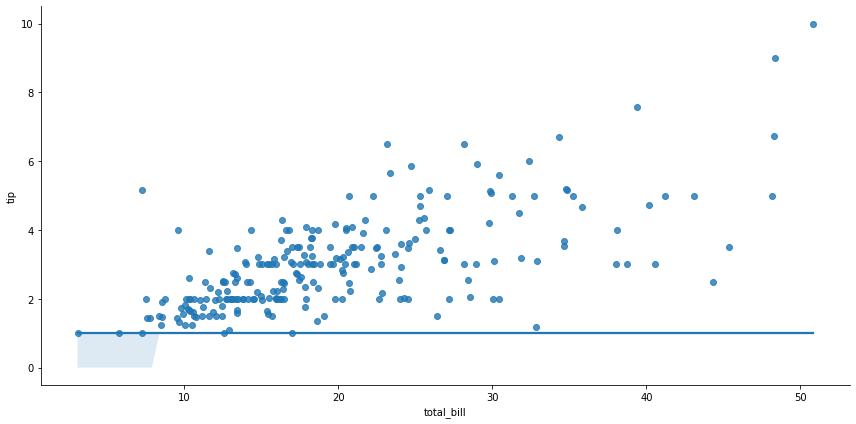

In [91]:
plt.figure(figsize=(16, 9))
sns.lmplot(x="total_bill", y="tip", data=tips_df, height=6, aspect=2, logistic=True)

**Biểu đồ xu hướng trong seaborn thì giống biểu đồ scatter, nhưng bổ sung phần linear regression

Vẽ nhiều xu hướng trên cùng một đồ thị để so sánh

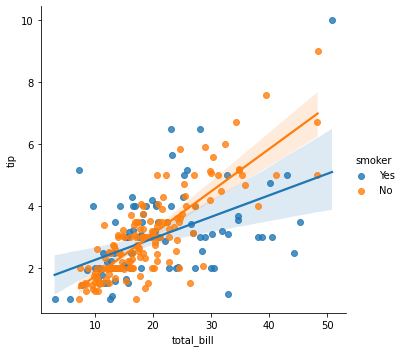

In [52]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips_df) 


#3. Biểu đồ violin
- Ý nghĩa: Giống như boxplo, thể hiện phân bố dữ liệu, tuy nhiên, tốt hơn vì thể hiện được độ phân bố dựa trên độ rộng của vùng phân bố
- Cú pháp: sns.violinplot(y = tips["total_bill"], palette="coolwarm") 


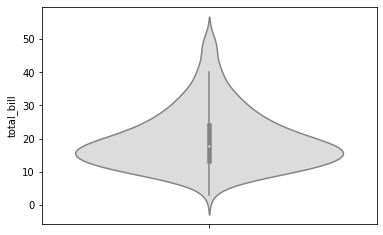

In [53]:
sns.violinplot(y = tips_df["total_bill"], palette="coolwarm") 


Vẽ nhiều đồ thị violin trên cùng một hình

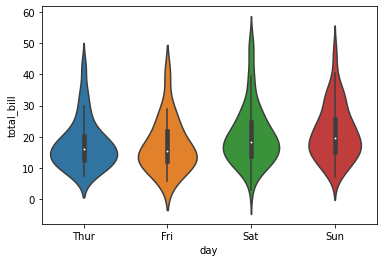

In [54]:
sns.violinplot(y = tips_df["total_bill"], x="day", data=tips_df) 

Chia dữ liệu theo các phần khác nhau để so sánh

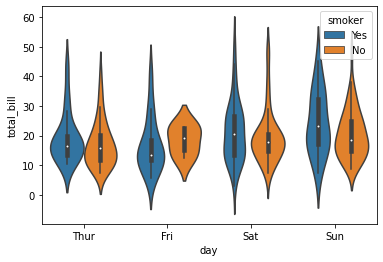

In [55]:
sns.violinplot(y = tips_df["total_bill"], x="day", data=tips_df, hue="smoker")

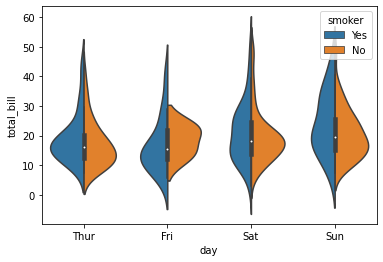

In [56]:
sns.violinplot(y = tips_df["total_bill"], x="day", data=tips_df, hue="smoker", split=True)

#4. Biểu đồ đếm
- Ý nghĩa: Biểu diễn đồ tần số dạng bar
- Cú phapsL dùng hàm countplot

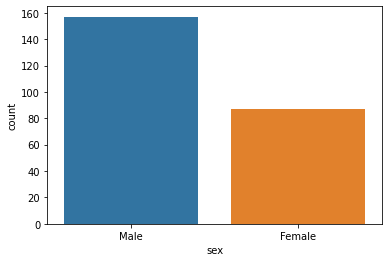

In [57]:
sns.countplot(x="sex", data=tips_df)

Vẽ biểu đồ đếm cho nhiều cột dữ liệu bằng cách tách giới

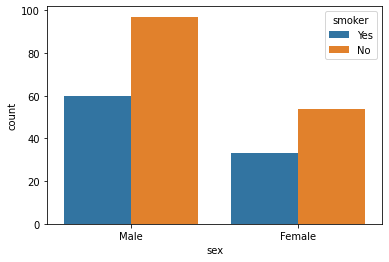

In [58]:
sns.countplot(x="sex", data=tips_df, hue="smoker")

#5. Biểu đồ heatmap
- Ý nghĩa: Mô tả tương quan của dữ liệu (correlation)
- Cú pháp: sns.heatmap(data), trong đó data là một cái dữ liệu 2 chiều, cần phải tính heatmap (mối quan hệ tương quan)
- Trong heatmap, nơi tập trung nhiều dữ liệu, được biểu diễn bởi màu sáng, nơi tập trung ít dữ liệu thì biểu diễn bởi màu tối

Bài toán: Tìm tương quan giữa giới tính và người hút thuốc

In [59]:
sex_df = tips_df.groupby(by=["sex", "smoker"]).count()
sex_df.head()

total_bill  tip  day  time  size
sex    smoker                                  
Male   Yes             60   60   60    60    60
       No              97   97   97    97    97
Female Yes             33   33   33    33    33
       No              54   54   54    54    54

# Chuyển index thành cột dữ liệu

In [60]:
sex_df.reset_index(inplace=True)
sex_df.head()

,sex,smoker,total_bill,tip,day,time,size
0,Male,Yes,60,60,60,60,60
1,Male,No,97,97,97,97,97
2,Female,Yes,33,33,33,33,33
3,Female,No,54,54,54,54,54


**Chú ý: Các cột khác ngoài sex và smoker đều là count <br/>
Nhiệm vụ là chuyển giới tính và smoker thành mảng 2 chiều


In [61]:
sex_df = sex_df.pivot("sex", "smoker", "tip")
sex_df

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


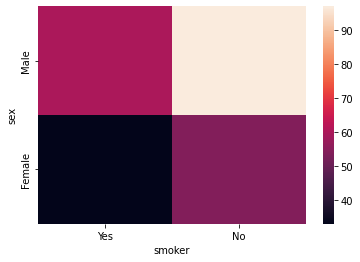

In [62]:
sns.heatmap(sex_df)

Thử tìm mối tương quan giữ tip và ngày trong tuần

In [75]:
day_df = tips_df.groupby(by=["sex", "day"]).sum()
day_df.reset_index(inplace=True)

In [76]:
day_df.head()

,sex,day,total_bill,tip,size
0,Male,Thur,561.44,89.41,73
1,Male,Fri,198.57,26.93,21
2,Male,Sat,1227.35,181.95,156
3,Male,Sun,1269.46,186.78,163
4,Female,Thur,534.89,82.42,79


In [77]:

day_df = day_df.pivot("sex", "day", "total_bill")
day_df

day,Thur,Fri,Sat,Sun
sex,,,,
Male,561.44,198.57,1227.35,1269.46
Female,534.89,127.31,551.05,357.70


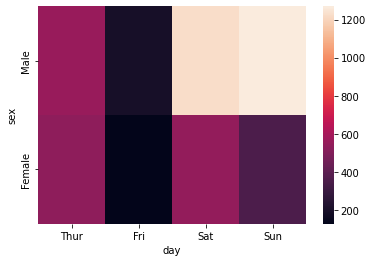

In [78]:
sns.heatmap(day_df)

#7. Biểu đồ hộp boxplot
- Seaborn giúp vẽ dễ ràng hơn và hỗ trợ vẽ nhiều box trên cùng một biểu đồ dễ hơn.
- sns.boxplot(params...)

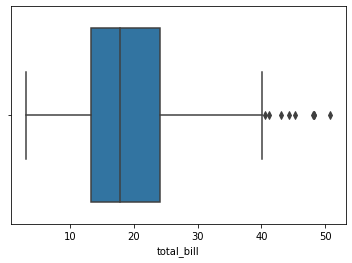

In [79]:
sns.boxplot(x=tips_df.total_bill)

Vẽ nhiều box trên cùng đồ thị

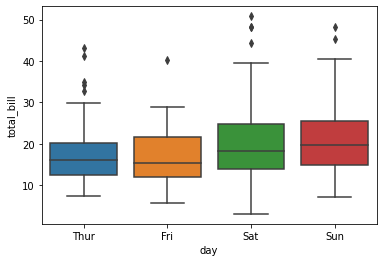

In [80]:
sns.boxplot(x="day", y="total_bill", data=tips_df)

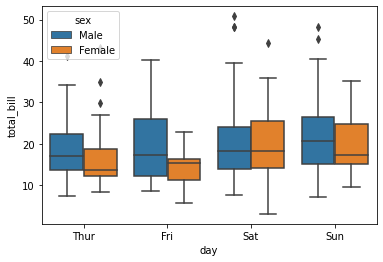

In [81]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips_df)

#8. Vẽ biểu đồ theo cặp
- Ý nghĩa: giúp so sánh dữ liệu dễ ràng
- Cú pháp: sns.pairplot

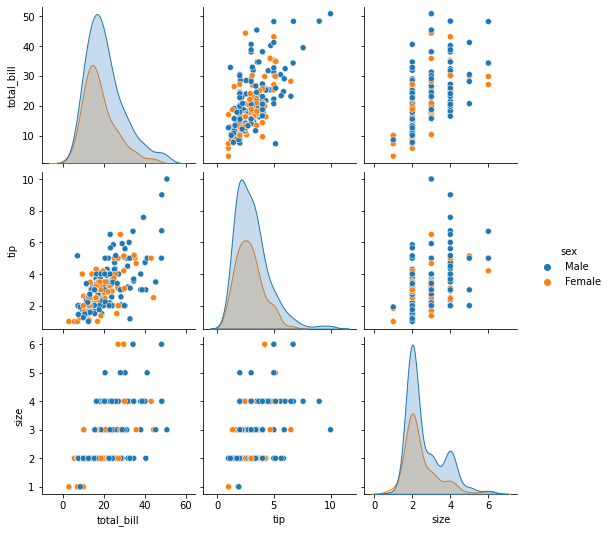

In [82]:
sns.pairplot(data=tips_df, hue="sex")

# Thêm figure cho đồ thị seabor

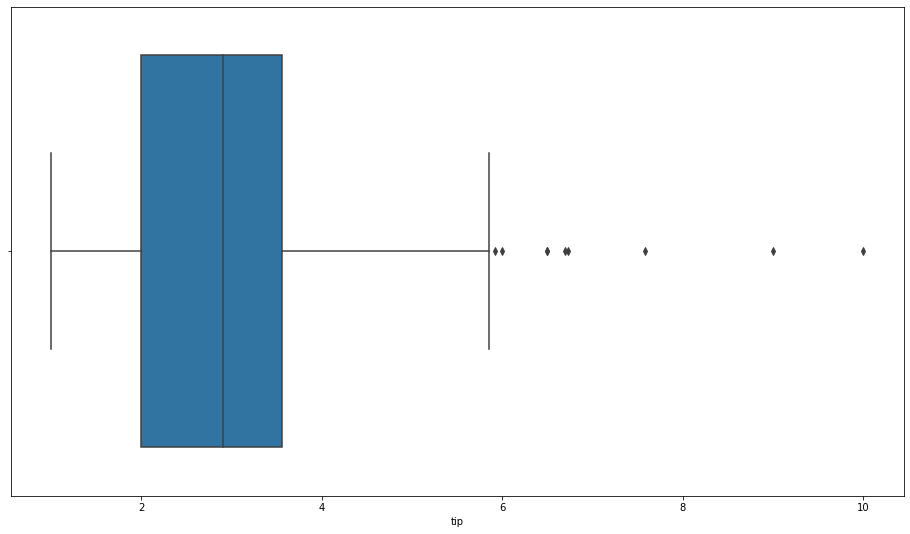

In [84]:
plt.figure(figsize=(16,9))
sns.boxplot(x="tip", data=tips_df)

# Vẽ đồ thị dựa vào dataframe

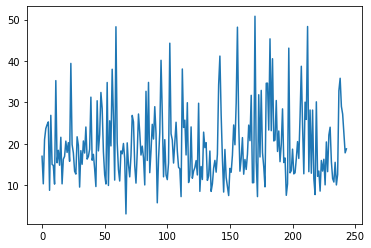

In [92]:
tips_df.total_bill.plot.line()

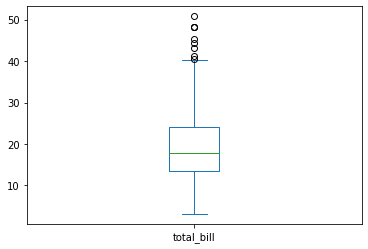

In [93]:
tips_df.total_bill.plot.box()

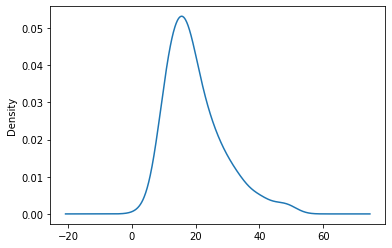

In [94]:
tips_df.total_bill.plot.density()

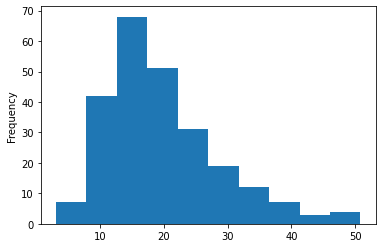

In [95]:
tips_df.total_bill.plot.hist()

# Vẽ đồ thị con trong đồ thị to